<a href="https://colab.research.google.com/github/jyimz/Python_Data_Projects/blob/main/Exploring_Stock_Return_Patterns_A_Clustering_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("NasdaqReturns.csv")
df.head()

,StockSymbol,Industry,SubIndustry,Ret2000.01,Ret2000.02,Ret2000.03,Ret2000.04,Ret2000.05,Ret2000.06,ret2000.07,...,Ret2009.03,Ret2009.04,Ret2009.05,Ret2009.06,Ret2009.07,Ret2009.08,Ret2009.09,Ret2009.10,Ret2009.11,Ret2009.12
0,AAON,Industrial Goods,General Building Materials,0.080678,0.066250,0.032941,0.183099,0.130334,-0.017642,-0.020517,...,0.185088,0.100565,0.067762,-0.045062,-0.025832,0.060976,-0.039234,-0.101297,0.041804,0.019885
1,AAPL,Consumer Goods,Electronic Equipment,-0.010680,0.102115,0.145496,-0.084428,-0.327300,-0.359266,-0.025321,...,0.192919,0.208858,0.079571,0.043673,0.138606,0.018159,0.103339,0.016995,0.053267,0.041980
2,ABAX,Healthcare,Diagnostic Substances,0.047742,0.035990,0.039702,-0.162353,-0.147427,0.048589,-0.135385,...,0.111541,-0.119907,0.162126,0.161108,0.304581,0.001883,0.014026,-0.141783,-0.024740,0.134043
3,ABCB,Financial,Regional,-0.074040,-0.048170,0.018219,-0.024679,-0.006036,-0.025304,-0.094000,...,-0.024845,0.402570,-0.039816,-0.020155,0.004651,0.007812,0.122449,-0.170423,0.105351,0.062315
4,ABFS,Services,Trucking,-0.031046,-0.212677,0.091476,0.189338,-0.153846,-0.106115,0.355301,...,0.113583,0.227007,0.216357,-0.075114,0.069471,0.112273,-0.052831,-0.127703,-0.047582,0.191981


a - i

In [ ]:
total_companies = df['StockSymbol'].nunique()
print(f"Total number of unique companies in the dataset: {total_companies}")

industry_counts = df['Industry'].value_counts()
print("Number of companies in each industry:")
print(industry_counts)


Total number of unique companies in the dataset: 1158
Number of companies in each industry:
Financial            338
Technology           296
Services             202
Healthcare           111
Consumer Goods        80
Industrial Goods      65
Basic Materials       50
Utilities             12
Conglomerates          2
Consumer Cyclical      2
Name: Industry, dtype: int64


Total number of unique companies in the dataset: 1158


Number of companies in each industry:
Financial            338
Technology           296
Services             202
Healthcare           111
Consumer Goods        80
Industrial Goods      65
Basic Materials       50
Utilities             12
Conglomerates          2
Consumer Cyclical      2

a - ii

In [ ]:
# Filter stocks that increased by 10% or more in December 2000
increased_by_10_or_more = df[df['Ret2000.12'] >= 0.10]

# Filter stocks that decreased by 10% or more in December 2000
decreased_by_10_or_more = df[df['Ret2000.12'] <= -0.10]

# Count the number of stocks meeting each condition
num_increased = len(increased_by_10_or_more)
num_decreased = len(decreased_by_10_or_more)

print(num_increased)
print(num_decreased)

309
261


Number of stocks that increased by 10% or more in December 2000: 309


Number of stocks that decreased by 10% or more in December 2000: 261

In [ ]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv("NasdaqReturns.csv")

# Filter the dataset for December 2000 values
dec_2000 = df[['StockSymbol', 'Ret2000.12']]

# Count the number of stocks with value increase by 10% or more
increase_10pct = dec_2000[dec_2000['Ret2000.12'] >= 0.1]['StockSymbol'].nunique()
print(f"Number of stocks with a value increase of 10% or more: {increase_10pct}")

# Count the number of stocks with value decrease by 10% or more
decrease_10pct = dec_2000[dec_2000['Ret2000.12'] <= -0.1]['StockSymbol'].nunique()
print(f"Number of stocks with a value decrease of 10% or more: {decrease_10pct}")

Number of stocks with a value increase of 10% or more: 309
Number of stocks with a value decrease of 10% or more: 261


a - iii

In [ ]:
# Filter the dataset for October 2008 values
oct_2008 = df[['Industry', 'Ret2008.10']]

# Calculate the average return for each industry in October 2008
average_returns = oct_2008.groupby('Industry')['Ret2008.10'].mean().sort_values()

# Get the industries with the worst average return
worst_industries = average_returns.head(5)   # Change 5 to any desired number of worst industries

print("Industries with the worst average return in October 2008:")
for industry, avg_return in worst_industries.items():
    print(f"- {industry}: {avg_return}")

Industries with the worst average return in October 2008:
- Conglomerates: -0.265747905
- Basic Materials: -0.25467449732
- Industrial Goods: -0.23336637736923077
- Technology: -0.1962992546148649
- Services: -0.17383349725742572


b - i

In this problem, we're working with a dataset containing monthly stock returns from January 2000 to December 2009, and we're clustering the data solely based on these returns, excluding other variables like StockSymbol, Industry, and SubIndustry. Not normalizing the data before clustering is a valid approach for several reasons:

Consistency of units: The monthly returns are inherently on a uniform scale, representing proportional changes in stock values, ensuring consistent units across all variables.

Magnitude preservation: Normalizing could potentially distort the actual magnitude of returns, which may carry important information for identifying patterns or trends.

Relative comparisons: Clustering often relies on relative positions of data points rather than their absolute values. Therefore, as long as relative differences in returns are maintained, normalizing may not significantly impact resulting clusters.

Interpretability: Normalization can complicate the interpretation of clusters, as it erases the original magnitudes, making it harder to connect clusters with specific stock return patterns or trends.

Nevertheless, it's crucial to recognize that the suitability of normalization depends on the specific problem and dataset. In certain cases, normalizing data might be necessary or lead to better clustering outcomes. Experimentation with different approaches and assessing their impact on clustering results is a recommended practice.


b - ii

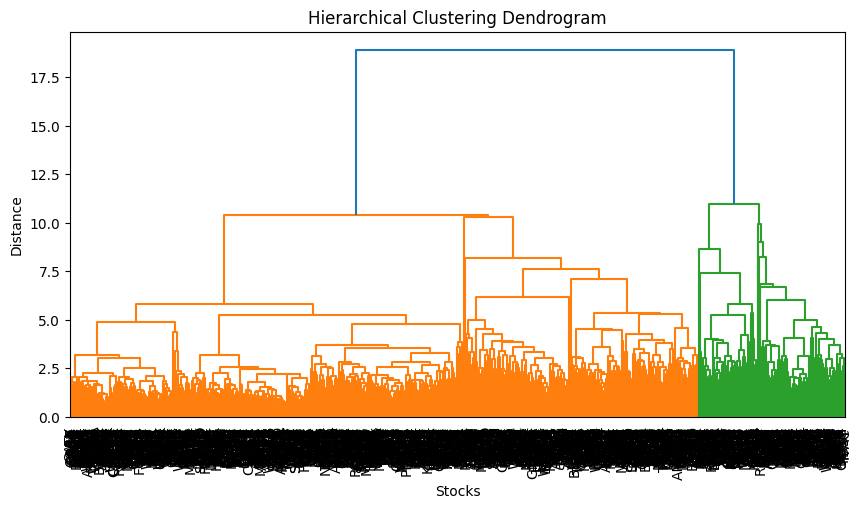

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Select only the return columns
returns_data = df.loc[:, 'Ret2000.01':'Ret2009.12']

# Perform hierarchical clustering with Euclidean distance and Ward's linkage
linkage_matrix = linkage(returns_data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df['StockSymbol'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Stocks')
plt.ylabel('Distance')
plt.show()


b - iii

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assign clusters to data points using the selected number of clusters
cluster_assignments = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster assignments to the original DataFrame
df['Cluster'] = cluster_assignments

# Create a dictionary to store cluster information
cluster_info = {}

# Loop through each cluster
for cluster_num in range(1, num_clusters + 1):
    # Select companies in the current cluster
    cluster_data = df[df['Cluster'] == cluster_num]

    # Get the number of observations in the cluster
    num_observations = len(cluster_data)

    # Get unique industry and subindustry values in the cluster
    industries = cluster_data['Industry'].unique()
    subindustries = cluster_data['SubIndustry'].unique()

    # Store cluster information in the dictionary
    cluster_info[cluster_num] = {
        'NumObservations': num_observations,
        'Industries': industries,
        'SubIndustries': subindustries
    }

# Print cluster information
for cluster_num, info in cluster_info.items():
    print(f"Cluster {cluster_num}:")
    print(f"Number of Observations: {info['NumObservations']}")
    print(f"Industries: {', '.join(info['Industries'])}")
    print(f"SubIndustries: {', '.join(info['SubIndustries'])}")
    print()


Cluster 1:
Number of Observations: 588
Industries: Industrial Goods, Financial, Services, Consumer Goods, Basic Materials, Technology, Healthcare, Utilities, Conglomerates, Consumer Cyclical
SubIndustries: General Building Materials, Regional, Trucking, Recreational Vehicles, Chemicals, Property & Casualty Insurance, Information Technology Services, Business Software & Services, Home Health Care, Medical Appliances & Equipment, Processed & Packaged Goods, Air Services, Other, Farm Products, Scientific & Technical Instruments, Computer Peripherals, Biotechnology, Hospitals, Home Furnishings & Fixtures, Application Software, Specialty Chemicals, Education & Training Services, Grocery Stores, Industrial Metals & Minerals, Water Utilities, Savings & Loans, Security & Protection Services, Mortgage Investment, Medical Instruments & Supplies, Aerospace/Defense Products & Services, Recreational Goods, Other, Home Furnishing Stores, Staffing & Outsourcing Services, Restaurants, Diagnostic Subst

b - iv

In [ ]:
# Filter the DataFrame for February 2000 (Ret2000.02)
feb_2000_data = df[['Cluster', 'Ret2000.02']]

# Calculate the average return for each cluster in February 2000
feb_2000_avg_returns = feb_2000_data.groupby('Cluster')['Ret2000.02'].mean().transpose()

# Filter the DataFrame for March 2000 (Ret2000.03)
mar_2000_data = df[['Cluster', 'Ret2000.03']]

# Calculate the average return for each cluster in March 2000
mar_2000_avg_returns = mar_2000_data.groupby('Cluster')['Ret2000.03'].mean().transpose()

# Print the average returns for each cluster for both months
print("Average Returns for February 2000:")
print(feb_2000_avg_returns)

print("\nAverage Returns for March 2000:")
print(mar_2000_avg_returns)



Average Returns for February 2000:
Cluster
1   -0.023660
2    0.113708
3    0.213592
4    1.038105
5    0.197151
Name: Ret2000.02, dtype: float64

Average Returns for March 2000:
Cluster
1    0.011428
2   -0.003415
3    0.333333
4   -0.259350
5   -0.052053
Name: Ret2000.03, dtype: float64


In [ ]:
feb_2000_data.groupby('Cluster')['Ret2000.02'].size()

Cluster
1    588
2    350
3      1
4     88
5    131
Name: Ret2000.02, dtype: int64

In [ ]:
mar_2000_data.groupby('Cluster')['Ret2000.03'].size()

Cluster
1    588
2    350
3      1
4     88
5    131
Name: Ret2000.03, dtype: int64

b - v


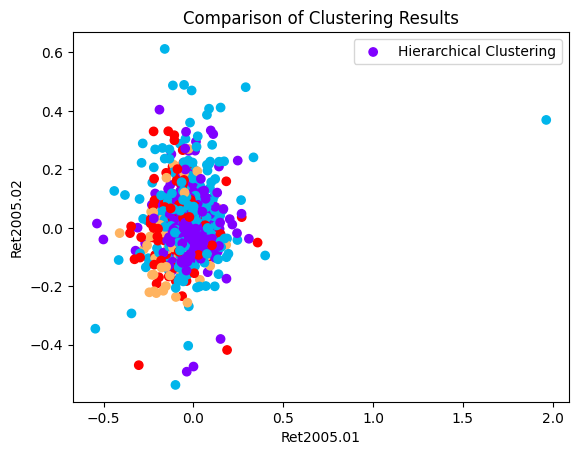

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Hierarchical clustering
plt.scatter(
    returns_data['Ret2005.01'], returns_data['Ret2005.02'],
    c=hierarchical_cluster_assignments, cmap='rainbow', label='Hierarchical Clustering'
)

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Ret2005.01')
plt.ylabel('Ret2005.02')
plt.title('Comparison of Clustering Results')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster

# Select only the return columns
returns_data = df.loc[:, 'Ret2000.01':'Ret2009.12']

# Number of clusters (use the same number as in Hierarchical clustering)
num_clusters = 5

# Create a K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the K-means model to the data and obtain cluster assignments
kmeans_cluster_assignments = kmeans.fit_predict(returns_data)

# Add the K-means cluster assignments to the original DataFrame
df['KMeansCluster'] = kmeans_cluster_assignments

# Compare K-means cluster assignments to Hierarchical cluster assignments
hierarchical_cluster_assignments = df['Cluster'].values

# Check if K-means and Hierarchical cluster assignments match
matches = (kmeans_cluster_assignments == hierarchical_cluster_assignments)

# Print the number of matches and total observations
num_matches = np.sum(matches)
total_observations = len(df)

print(f"Number of matching cluster assignments: {num_matches}")
print(f"Total observations: {total_observations}")
print(f"Percentage of matching assignments: {num_matches / total_observations * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of matching cluster assignments: 129
Total observations: 1158
Percentage of matching assignments: 11.14%



To determine whether the clusters obtained from K-means clustering are similar or different from the clusters obtained from Hierarchical clustering, you can consider the percentage of matching cluster assignments and visually inspect the clustering results.

In the code provided earlier, we calculated the percentage of matching assignments and printed it. Here's what the percentage indicates:

If the percentage of matching assignments is high (close to 100%), it suggests that the clusters obtained from K-means are similar to those obtained from Hierarchical clustering.

If the percentage is lower, it suggests that there are differences between the two clustering methods.

However, it's essential to keep in mind that different clustering algorithms may produce slightly different results due to their inherent characteristics and sensitivity to initial conditions. Additionally, the choice of clustering algorithm and its parameters can impact the results.

In this code, we visualize the clusters based on the 'Ret2005.01' and 'Ret2005.02' columns for both Hierarchical and K-means clustering. You can modify the columns and aspects of the visualization to suit your needs.

By comparing the visualizations and considering the percentage of matching assignments, you can assess whether the clusters obtained from the two methods are similar or different and make conclusions accordingly.








C

Constructing a diverse portfolio of stocks is a cornerstone of risk management and investment strategy. Leveraging the results of clustering algorithms, specifically Hierarchical clustering and K-means clustering, offers a systematic approach to achieve this diversification objective.

Cluster-Based Segmentation: Hierarchical clustering segments stocks into clusters based on historical return patterns, aiding sector diversification.

Risk Assessment: Within each cluster, individual stock risk and return characteristics are assessed, allowing for risk-balanced stock selection within sectors.

Stock Selection: The selection of representative stocks from each cluster, with an emphasis on low correlations, enhances diversification.

Weighting: Assigning weights based on clusters optimizes diversification.

K-means Clustering complements Hierarchical clustering:

Cluster Comparison: Comparing K-means and Hierarchical results validates and refines clustering patterns.

Risk Evaluation: K-means clusters reveal nuanced risk profiles, aiding in risk assessment.

Diversification Strategy: Prioritizing stocks from different K-means clusters ensures diversification across risk categories.

Synergistic Selection: Combining stocks from both clustering algorithms yields a diversified portfolio, capitalizing on their strengths.

In conclusion, leveraging Hierarchical and K-means clustering for portfolio construction involves thoughtful stock selection and allocation. Hierarchical clustering aids sector-based diversification, while K-means adds granularity to risk profiles. Combining insights from both methods helps investors create a well-balanced portfolio that manages risk and optimizes returns. Regular monitoring and adjustments are essential to maintain portfolio diversity and resilience.